In [1]:
from sklearn import datasets as ds
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
X, y = ds.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                              n_classes=4, n_clusters_per_class=1,class_sep=3.0, )

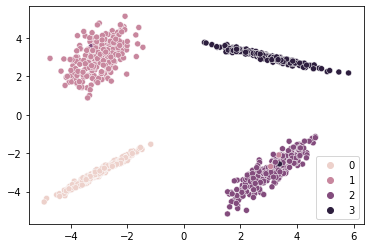

In [3]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

In [4]:
np.min(X, axis=0)

array([-4.9410505 , -5.15879725])

In [5]:
k = 4
centroids = []
for c in range(k):
    centroid = []
    for i in range(X.shape[1]):
        p = random.uniform(X[:,i].min(), X[:,i].max())
        centroid.append(p)
    centroids.append(centroid)
    
    

In [6]:
centroids

[[-0.00912564069309596, -0.3458666543292894],
 [-0.2797123261680836, 0.38609660892776887],
 [-4.918992695556871, -1.1089253769344278],
 [-1.3630937473511198, -1.1976963017641769]]

In [7]:
centroids = np.array(centroids)
centroids.shape

(4, 2)

In [8]:
centroids = np.reshape(centroids, (centroids.shape[0], 1, centroids.shape[1]))
centroids.shape

(4, 1, 2)

In [9]:
dist = np.sum(np.square(X - centroids), axis=2)

In [13]:
new_clusters = np.argmin(dist, axis=0)

In [14]:
centroids = []
cluster_variances = []
for c in range(k):
    cluster = X[new_clusters == c]
    mean = np.mean(cluster, axis=0)
    diffs =  np.square(cluster - mean)
    avg_diffs = 1/diffs.shape[0] * np.sum(diffs, axis=0)
    variance = np.sum(avg_diffs)
    cluster_variances.append(variance)
    centroids.append(mean.tolist())

In [15]:
cluster_variances

[1.206225905333028, 8.884675967351768, 7.68045149021892, 0.5848601534539007]

In [16]:
centroids

[[3.0804026646477896, -2.920371036119502],
 [0.3976237295865522, 3.115959722598531],
 [-3.719757677642185, -1.4815258588801716],
 [-2.54463527974047, -2.686210991954806]]

In [76]:

def K_Means(X, k = 4, iteration=5):
    ## Campture cluster centroid hostory
    history_centroid = []
    history_varience = []
    ## Initializie random cluster centroids
    centroids = []
    for c in range(k):
        centroid = []
        for i in range(X.shape[1]):
            p = random.uniform(X[:,i].min(), X[:,i].max())
            centroid.append(p)
        centroids.append(centroid)
    
    for _ in range(iteration):
        
        ## Preparing for matrix operation
        centroids = np.array(centroids)
        centroids = np.reshape(centroids, (centroids.shape[0], 1, centroids.shape[1]))

        ## Assign each point to closest cluster based on Euclidean distsnace

        # Euclidiean distance
        dist = np.sum(np.square(X - centroids), axis=2)

        #based on distance reassign the clusters
        new_clusters = np.argmin(dist, axis=0)
        
        
        history_centroid.append(centroids) # centroids for each iteration

        ## Compute the cluster variances also new centroids

        centroids = []
        cluster_variances = []
        for c in range(k): ## for each cluster
            cluster = X[new_clusters == c]
            mean = np.mean(cluster, axis=0)
            sum_diffs =  np.sum(np.square(cluster - mean), axis=0)
            #avg_diffs = 1/diffs.shape[0] * np.sum(diffs, axis=0)
            variance = 1/cluster.shape[0] * np.sum(sum_diffs)
            cluster_variances.append(variance)
            centroids.append(mean.tolist())

        
        history_varience.append(cluster_variances) # variane of each cluster for each iteration
        
    return new_clusters, history_centroid, history_varience
    
    



In [77]:
k = 4
iterations=10
new_clusters, history_centroid, history_varience = K_Means(X, k, iterations)

In [78]:
last_centroids = history_centroid[-1]
last_centroids = np.reshape(last_centroids, (last_centroids.shape[0],last_centroids.shape[-1]))
last_centroids.shape

(4, 2)

In [79]:
history_centroid_array = np.reshape(np.array(history_centroid), 
                              (iterations * k,X.shape[-1]))
history_centroid_array.shape

(40, 2)

In [80]:
iter_index = [i for i in range(iterations) for _ in range(k)]

In [96]:
cluster_index = list(range(k)) * iterations

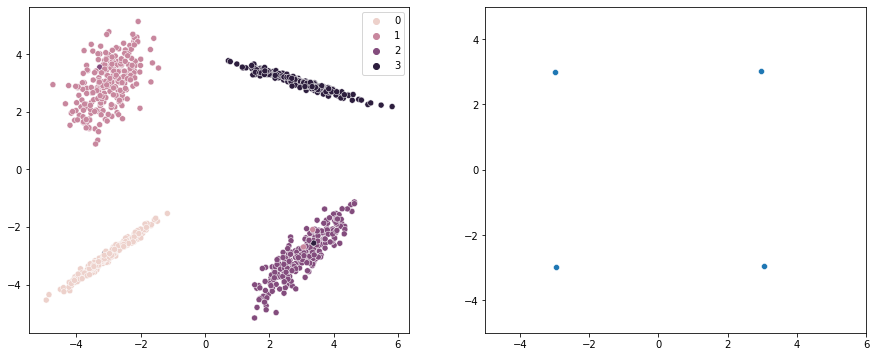

In [81]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

plt.subplot(1,2,2)
sns.scatterplot(x=last_centroids[:,0], y=last_centroids[:,1])
plt.xlim([-5, 6])
plt.ylim([-5, 5])

plt.show()

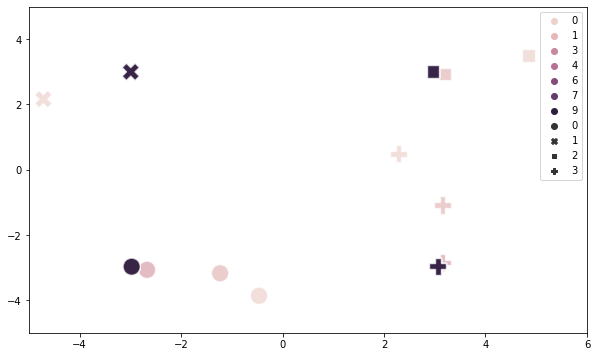

In [97]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=history_centroid_array[:,0], y=history_centroid_array[:,1], 
                hue=iter_index, s=300, alpha=0.7, style=cluster_index)
plt.xlim([-5, 6])
plt.ylim([-5, 5])
plt.show()